In [1]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
# simDataFile = 'iwCabData/config_11/y_hourly.csv'
fieldDataFile = 'iwCabData/config_11/y_hourly.csv'

In [15]:
# Read file
#D_COMP = np.genfromtxt(simDataFile, delimiter = ',')
D_FIELD = np.genfromtxt(fieldDataFile, delimiter = ',', skip_header = 1)
ydim = 2

In [41]:
#D_FIELD = D_FIELD[:, 1:]
yf = D_FIELD[:, 1:3]

In [42]:
yf

array([[ 21.27891391,  24.54608278],
       [ 21.2373823 ,  24.62155711],
       [ 21.14239322,  25.92720303],
       ..., 
       [ 21.83110551,   0.        ],
       [ 21.63954949,   0.        ],
       [ 21.44126395,   1.83220653]])

In [43]:
"""
D_COMP = D_COMP[0:, :]
D_FIELD = D_FIELD[0:, :]
y = D_FIELD[:,0:ydim]
xf = D_FIELD[:,ydim:]
(n,p) = xf.shape
eta = D_COMP[:,0:ydim]
xc = D_COMP[:,ydim:(ydim+p)]
tc = D_COMP[:,(p+ydim):]
(m,q) = tc.shape
x = np.concatenate((xf,xc), axis=0)
"""

'\nD_COMP = D_COMP[0:, :]\nD_FIELD = D_FIELD[0:, :]\ny = D_FIELD[:,0:ydim]\nxf = D_FIELD[:,ydim:]\n(n,p) = xf.shape\neta = D_COMP[:,0:ydim]\nxc = D_COMP[:,ydim:(ydim+p)]\ntc = D_COMP[:,(p+ydim):]\n(m,q) = tc.shape\nx = np.concatenate((xf,xc), axis=0)\n'

In [44]:
#yf = D_FIELD[:, 0:2]
#yc = D_COMP[:, 0:2]

In [45]:
#x.min(axis = 0)

In [46]:
#x = (x - x.min(axis = 0)) / x.ptp(axis = 0); # Min max norm

In [47]:
yf

array([[ 21.27891391,  24.54608278],
       [ 21.2373823 ,  24.62155711],
       [ 21.14239322,  25.92720303],
       ..., 
       [ 21.83110551,   0.        ],
       [ 21.63954949,   0.        ],
       [ 21.44126395,   1.83220653]])

In [48]:
yf_mu = np.mean(yf, axis = 0)
yf_sd = np.std(yf, axis = 0)
yf = (yf - yf_mu) / yf_sd
#z = np.concatenate((yf,yc), axis=0);

In [49]:
yf_mu

array([ 21.89921159,  20.10983827])

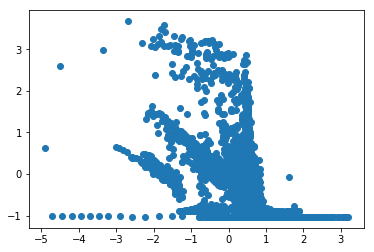

In [50]:
plt.scatter(yf[:, 0], yf[:, 1])
plt.show()

In [51]:
pcaz = PCA(n_components = 1)
pcaz.fit(yf)
ztrans = pcaz.transform(yf)

In [52]:
ztrans.reshape((-2,))
pcaz.explained_variance_ratio_

array([ 0.69247778])

In [53]:
pcaz.components_

array([[-0.70710678,  0.70710678]])

In [43]:
ztrans

array([[  4.45464465],
       [  4.53147704],
       [  5.8395842 ],
       ..., 
       [-20.09609533],
       [-20.08963341],
       [-18.25178075]])

In [44]:
plt.scatter(yftrans[:, 0], yftrans[:, 1])
plt.show()

NameError: name 'yftrans' is not defined

In [45]:
pcaz_kernel = KernelPCA(n_components = 2, kernel = 'rbf')
pcaz_kernel.fit(yf)
ztrans_kernel = pcaz_kernel.transform(yf)

In [46]:
explained_var = np.var(ztrans_kernel, axis = 0)


In [47]:
explained_var

array([ 0.07544996,  0.05051839])